# Easy data processing
Using the `Experiment` and `DataRun` class to generalize processing data. General usage:

1. Create an `Experiment`
2. Use the `structured_data` method to extract the parameter of interest
3. Plot

In [2]:
import sys
sys.path.append("../")
import datarun
from matplotlib import pyplot as plt
import numpy as np
import os
from scipy.optimize import curve_fit

In [3]:
#If you make a change to datarun.py, run this cell or restart your kernel
import importlib
importlib.reload(datarun)

<module 'datarun' from '/home/ben/Documents/Repos/MOTsArentForKids/MOT_loading_time/../datarun.py'>

In [4]:
d = datarun.Experiment(
    vlist = [10,20,40,60,80],
    idx_start = 164,
    datapath = "../data/mar30/load_time/",
    numtrials = 16,
    mask = .20
)

|████████████████████████████████████████| 80/80 [100%] in 5:09.0 (0.26/s)      


In [23]:
def loading_dyn(x,a,b):
    return a/b*(1-np.exp(-x*b))


In [40]:
N_list = d.structure_data(lambda d: d.atom_number_px_sum())
yerr = [np.nanstd(arr) for arr in N_list.values()]/np.sqrt(16)
means = [np.mean(arr) for arr in N_list.values()]


for arr in N_list.values():
    mean = np.mean(arr)
    std = np.std(arr)

    for val in arr:
        if np.abs(val-mean) > 2*std:
            arr.remove(val)
            print("removed")

popt,pcov=curve_fit(loading_dyn, d.vlist, means, p0 = (1e8,1e-1), sigma=yerr, absolute_sigma=True)
ratio = popt[0]/popt[1]

removed
removed
removed
removed


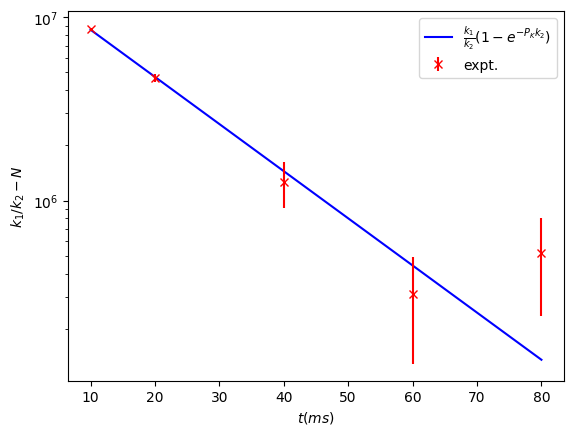

In [50]:
xdata=np.linspace(min(x_plot),max(x_plot),1000)

def yax(yval):
    return ratio-yval

plt.plot(xdata, yax(loading_dyn(xdata,*popt)),'-b', label = r"$\frac{k_1}{k_2}(1-e^{-P_Kk_2})$")

plt.errorbar(d.vlist, yax(np.array(means)), yerr, linestyle = "None", color = "r", marker = "x", label = "expt.")
#for datum in d.data:
    #plt.scatter(datum.value, yax(datum.atom_number_px_sum()), color = "k", marker = '.', linestyle = "None", alpha = .2)

plt.xlabel(r"$t (ms)$")
plt.ylabel(r"$k_1/k_2-N$")
plt.legend(loc="upper right")
plt.yscale("log")
plt.savefig("../figures/loading_time_take_2.png", dpi=200)

## Plot fits

In [48]:
popt[1]

0.05921223978815889

In [34]:
np.sqrt(pcov[0][0])

465.42944435559184

In [35]:
np.sqrt(pcov[1][1])

0.005574975118016282

In [39]:
popt[1]/popt[0]

6.465863324069721e-08

In [38]:
np.sqrt((pcov[1][1]/popt[0]**2)+(popt[1]**2/popt[0]**4*pcov[0][0]))

3.4296744603344166e-07